# ***Importing libraries***
---

In [2]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augumentation

In [3]:

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Augumentation on training data
---

In [5]:
x_train = train_datagen.flow_from_directory('C:/Users/Tamilarasu.V/OneDrive/Documents/flowers', target_size=(64,64), class_mode='categorical', batch_size=100)

Found 4317 images belonging to 5 classes.


# Data Augumentation on testing data

In [6]:
x_test = test_datagen.flow_from_directory('C:/Users/Tamilarasu.V/OneDrive/Documents/flowers', target_size=(64,64), class_mode='categorical', batch_size=100)

Found 4317 images belonging to 5 classes.


# CNN Model Training

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [9]:
model = Sequential()
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x_train, steps_per_epoch=len(x_train), epochs=10, validation_data=x_test, validation_steps=len(x_test))

Epoch 1/10
44/44 [==============================] - 69s 2s/step - loss: 1.3670 - accuracy: 0.4471 - val_loss: 1.0734 - val_accuracy: 0.5777
Epoch 2/10
44/44 [==============================] - 45s 1s/step - loss: 1.0684 - accuracy: 0.5754 - val_loss: 1.0299 - val_accuracy: 0.6004
Epoch 3/10
44/44 [==============================] - 46s 1s/step - loss: 0.9937 - accuracy: 0.6150 - val_loss: 0.9611 - val_accuracy: 0.6310
Epoch 4/10
44/44 [==============================] - 45s 1s/step - loss: 0.9066 - accuracy: 0.6567 - val_loss: 0.9005 - val_accuracy: 0.6630
Epoch 5/10
44/44 [==============================] - 46s 1s/step - loss: 0.8492 - accuracy: 0.6701 - val_loss: 0.7693 - val_accuracy: 0.7176
Epoch 6/10
44/44 [==============================] - 49s 1s/step - loss: 0.8038 - accuracy: 0.7019 - val_loss: 0.7661 - val_accuracy: 0.7040
Epoch 7/10
44/44 [==============================] - 51s 1s/step - loss: 0.7592 - accuracy: 0.7067 - val_loss: 0.7814 - val_accuracy: 0.7070
Epoch 8/10
44/44 [==

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 5)                 755       
                                                        

In [15]:
test_loss, test_acc = model.fit(train_datagen, test_datagen, verbose=2)


ValueError: Failed to find data adapter that can handle input: <class 'keras.preprocessing.image.ImageDataGenerator'>, <class 'keras.preprocessing.image.ImageDataGenerator'>

### Save model

In [16]:
model.save('C:/Users/Tamilarasu.V/OneDrive/Documents/flowers/model_save.h5')

In [25]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf


import matplotlib.image as mpimg
%matplotlib inline

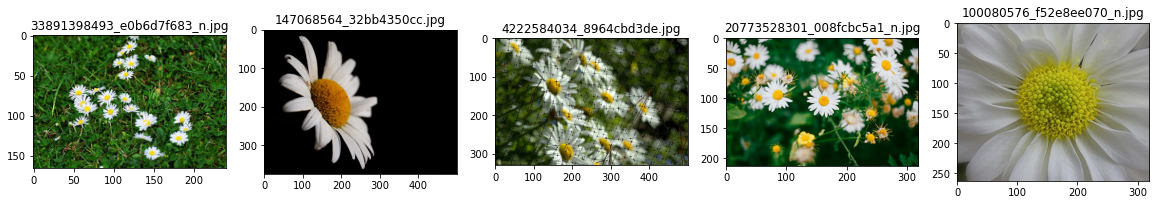

In [27]:
plt.figure(figsize=(20,20))
img_folder=r'C:/Users/Tamilarasu.V/OneDrive/Documents/flowers/daisy'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)